In [56]:
import h5py
import pandas as pd
from umap import UMAP
import matplotlib.pyplot as plt

In [89]:
# open h5py file
f = h5py.File('output/lfads-torch-example/241121_162711_exampleSingle/lfads_output_sess0.h5', 'r')
train_data = f['train_recon_data'][:]
valid_data = f['valid_recon_data'][:]
train_recon = f['train_output_params'][:]
valid_recon = f['valid_output_params'][:]
train_latents = f['train_ic_mean'][:]
train_factors = f['train_factors'][:]
annotations = pd.read_csv('datasets/sleep/train_annotations.csv')

In [58]:
f.keys()

<KeysViewHDF5 ['train_co_means', 'train_co_stds', 'train_con_states', 'train_encod_data', 'train_factors', 'train_gen_init', 'train_gen_inputs', 'train_gen_states', 'train_ic_mean', 'train_ic_std', 'train_output_params', 'train_recon_data', 'valid_co_means', 'valid_co_stds', 'valid_con_states', 'valid_encod_data', 'valid_factors', 'valid_gen_init', 'valid_gen_inputs', 'valid_gen_states', 'valid_ic_mean', 'valid_ic_std', 'valid_output_params', 'valid_recon_data']>

In [59]:
train_latents.shape

(6925, 16)

In [60]:
annotations

,subject,condition
0,0,1
1,2,4
2,4,5
3,5,3
4,5,3
...,...,...
6920,5,5
6921,1,2
6922,1,2
6923,0,1


In [61]:
event_id = {'Sleep stage W': 1,
            'Sleep stage 1': 2,
            'Sleep stage 2': 3,
            'Sleep stage 3/4': 4,
            'Sleep stage R': 5}

# invert the dictionary
event_id_inv = {v: k for k, v in event_id.items()}

In [62]:
event_id_inv

{1: 'Sleep stage W',
 2: 'Sleep stage 1',
 3: 'Sleep stage 2',
 4: 'Sleep stage 3/4',
 5: 'Sleep stage R'}

In [53]:
annotations['subject'].value_counts()

5    1129
4    1072
1    1068
0    1018
2     910
6     909
3     819
Name: subject, dtype: int64

In [63]:
annotations = annotations[annotations['subject'] == 1]
indices = annotations.index.to_list()

5
3
4
2
1


Text(0, 0.5, 'UMAP 2')

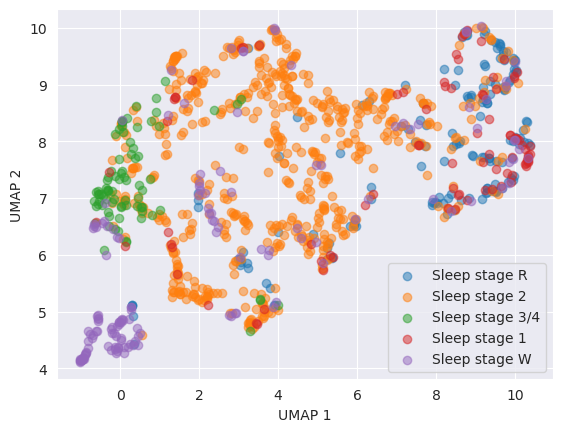

In [81]:
%matplotlib inline
umap = UMAP(n_components=2, min_dist=0., n_neighbors=15, metric='euclidean')
embeddings = umap.fit_transform(train_latents[indices, :]) # TEST

unique_conditions = annotations['condition'].unique()
for condition in unique_conditions:
    print(condition)
    condition_mask = annotations['condition'] == condition#
    # Plot a scatter plot giving a distinct color to each condition from event_id_inv
    plt.scatter(embeddings[condition_mask, 0], embeddings[condition_mask, 1], label=event_id_inv[condition], alpha=0.5)
    #plt.scatter(embeddings[condition_mask, 0], embeddings[condition_mask, 1], label=condition)
plt.legend()
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
    #plt.scatter(embeddings[condition_mask, 0], embeddings[condition_mask, 1], label=condition)


In [90]:
train_data.shape

(6925, 500, 2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'UMAP 2')

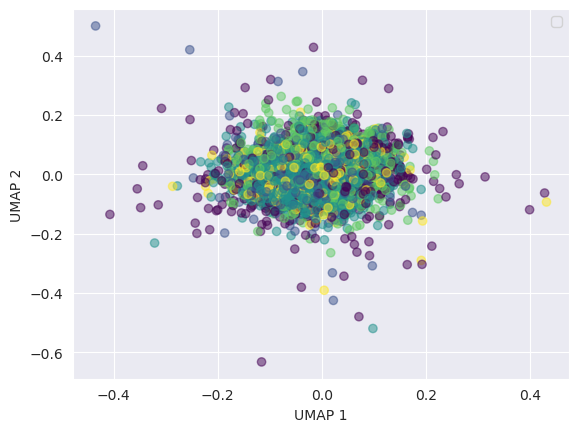

In [91]:
# train_data = train_data[indices, :, :].reshape(-1, 2)
plt.scatter(train_data.mean(axis=1)[:,0], train_data.mean(axis=1)[:,1], alpha=0.5, callable c=annotations['condition'], cmap='viridis')
    #plt.scatter(embeddings[condition_mask, 0], embeddings[condition_mask, 1], label=condition)
plt.legend()
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')